In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

In [4]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
target = train["label"]
train = train.drop("label",1)

In [6]:
n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

(0.9, 600)

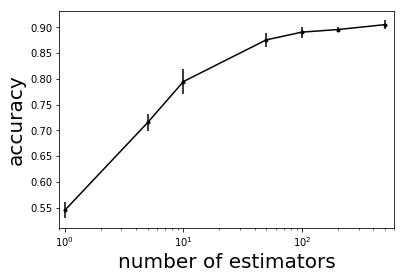

In [13]:
import matplotlib.pyplot as plt
plt.errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 20)
plt.ylabel("accuracy",size = 20)
plt.xlim(0.9,600)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 24)

In [15]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(X_train, y_train)
results=clf.predict(X_test)
accuracy_score(y_test, results)

0.9648412698412698

In [ ]:
#to create submission file

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(train, target)
results=clf.predict(test)

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')